## Working with Text Data and Naive Bayes in Skikit-Learn

In [1]:
#1 Give a simple dataset

In [40]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me...PLEASE!']

In [3]:
#2 Learn the 'vocabulary' of the training data

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
vec.fit(simple_train)
vec.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [4]:
#3 Transform training data into 'document-term matrix'

simple_train_dtm = vec.transform(simple_train)
simple_train_dtm # sparse matrix

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [5]:
#4 Print the sparse matrix 
print (simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [6]:
#5 Convert the sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [7]:
#6 Examine the vocabulary and document-term matrix together

import pandas as pd
pd.DataFrame(simple_train_dtm.toarray(), columns=vec.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [8]:
#7 Transform testing data into a document-term matrix
simple_test = ["please don't call me"]
simple_test_dtm = vec.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [9]:
#8 Examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vec.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [10]:
#9 Read tab-separated file
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv'
col_names = ['label', 'message']
sms = pd.read_csv(url, sep='\t', header=None, names=col_names)
print(sms.shape)

(5572, 2)


In [41]:
#10 Convert label to a numeric variable
sms['label'] = sms.label.map({'ham':0, 'spam':1})

In [42]:
#11 Define X and y
X = sms.message
y = sms.label

In [13]:
#12 Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [43]:
#13 Instantiate the vectorizer
vect = CountVectorizer()

In [15]:
#14 Learn training data vocabulary, then create document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [16]:
#15 Transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [17]:
#16 Train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
#17 Calculate accuracy of predictions
from sklearn import metrics
y_pred_class = nb.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9885139985642498


In [19]:
#18 Give the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1203    5]
 [  11  174]]


In [20]:
#19 Print message text for the false positives
X_test[y_test < y_pred_class]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [21]:
#20 Print message text for the false negatives
X_test[y_test > y_pred_class]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

## Linear Regression

In [22]:
# Loading Boston Housing Data from sklearn
from sklearn.datasets import load_boston 
boston = load_boston()

In [23]:
# Printing the data
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [24]:
#2. Adding Feature Names
x=pd.DataFrame(boston.data,columns=boston.feature_names)

In [25]:
# Setting the target variable for prediction
y=pd.DataFrame(boston.target)

In [26]:
# Analysing the features statistics
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [27]:
# Cheking for any null values
x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [28]:
#1. Finding the correlation between the features
x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [29]:
#3 Plotting the heatmap for correlation matrix
# The figure in the assignment 
from matplotlib import pyplot
import seaborn as sns
import numpy as np
dim = (16,9)
fig, ax = pyplot.subplots(figsize=dim)
correlation_matrix = x.corr().round(2)

# Added this code to show lower half of triangle
dropSelf = np.zeros_like(x.corr())
dropSelf[np.triu_indices_from(dropSelf)] = True
print(sns.heatmap(data=correlation_matrix, annot=True, mask=dropSelf))

AxesSubplot(0.125,0.11;0.62x0.77)


Q-4 In the above plot, what features are highly correlated? Which features are highly uncorrelated? 


The numbers inside the plot of the heatmap show the level of correlation between the features. So, if the correlation is between 0 & 1, the features are correlated and the more closer it is to 1, higher the correlation. The squares with light color gradient. 

Similarly if the correlation is between 0 & -1, the features are uncorrelated and the closed it is to -1, higher is the uncorrelation. The squares with the darker color gradient. 

To name a few:

        High Correlation: NOX & INDUS; TAX & INDUS; AGE & NOX; TAX & RAD

        High Uncorrelation: DIS & INDUS; DIS & NOX; DIS & AGE


In [30]:
# 5- Importing linear model and train_test_split
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [31]:
LM = linear_model.LinearRegression()

In [32]:
# Spliting the data into training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [33]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11


In [34]:
# Fitting the model
LM.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# 6 Predict the house prices.
LM.predict(x_test)

array([[12.07495986],
       [26.9894969 ],
       [17.58803353],
       [18.15584511],
       [36.92091659],
       [25.43267386],
       [31.09256932],
       [19.72549907],
       [19.66103377],
       [22.96358632],
       [28.38841214],
       [28.48925986],
       [18.99690357],
       [32.41097504],
       [21.52350275],
       [15.25945122],
       [21.23364112],
       [11.6220597 ],
       [11.37109662],
       [13.63515584],
       [ 5.62431971],
       [17.35323315],
       [20.80951594],
       [22.51311312],
       [16.39055556],
       [20.32352451],
       [17.88994185],
       [14.23445109],
       [21.1187098 ],
       [17.50765806],
       [14.54295525],
       [23.63289896],
       [34.32419647],
       [22.23027161],
       [16.82396516],
       [20.16274383],
       [30.67665825],
       [35.61882904],
       [23.50372003],
       [24.66451121],
       [36.91269871],
       [32.33290254],
       [19.11785719],
       [32.19546605],
       [33.42795148],
       [25

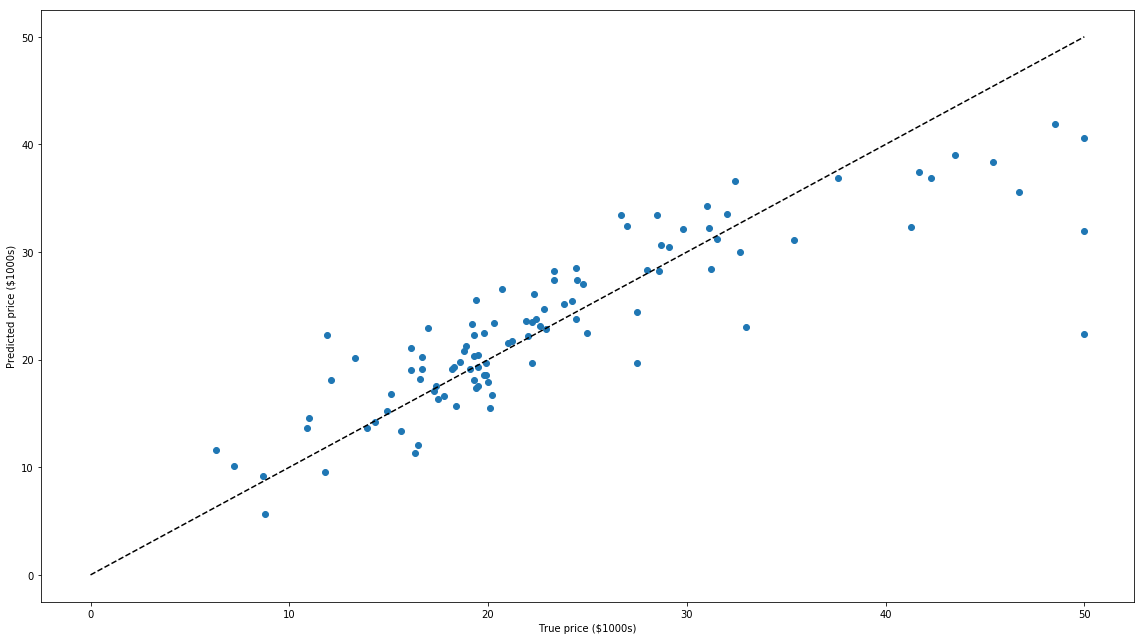

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))

predicted = LM.predict(x_test)
expected = y_test
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [44]:
# Scoring
LM.score(x_test, y_test)

0.7263451459702503

C:\Users\krapa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


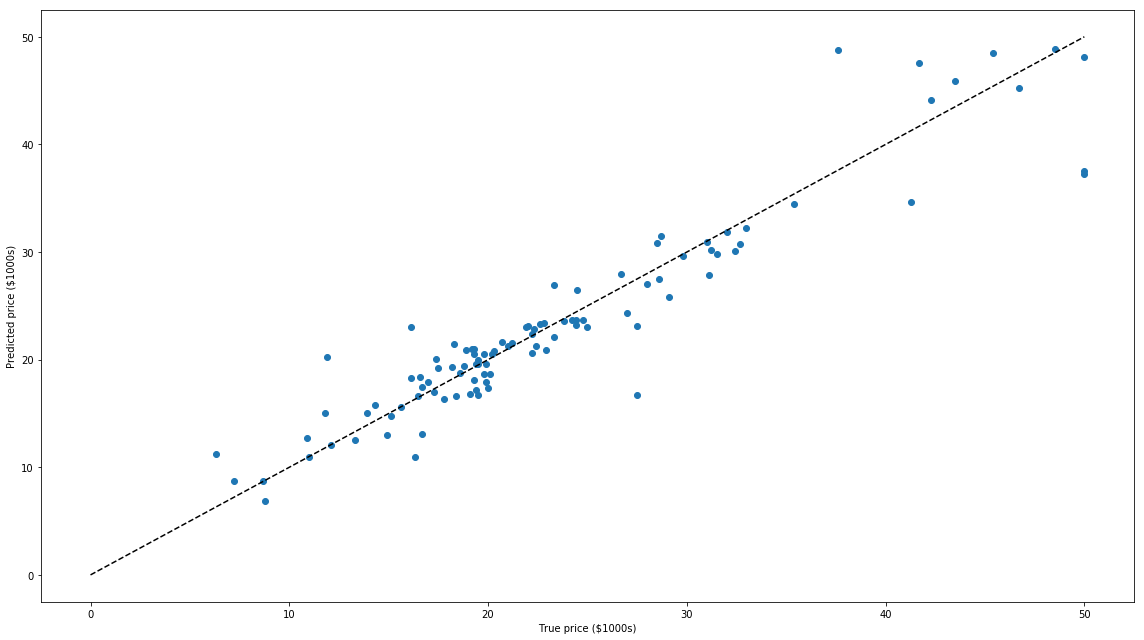

In [45]:
#8.b Improving the model using Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
plt.figure(figsize=(16, 9))
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)

predicted = GB.predict(x_test)
expected = y_test

plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

In [46]:
# Scoring
GB.score(x_test,y_test)

0.887062837730416

In [47]:
# Coefficients of the Linear Model
LM.coef_

array([[-1.15966452e-01,  4.71249231e-02,  8.25980146e-03,
         3.23404531e+00, -1.66865890e+01,  3.88410651e+00,
        -1.08974442e-02, -1.54129540e+00,  2.93208309e-01,
        -1.34059383e-02, -9.06296429e-01,  8.80823439e-03,
        -4.57723846e-01]])

Q-7 The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. What does a positive coefficient and a negative coefficient indicate respectively?

The positive and negative coefficients are analogous to the correlation, a +ve coefficient means high correlation while -ve coefficient mean low correlation.

In [ ]:
# 8-a: scoring model against the three matrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
pred = LM.predict(x_test)
print("R^2 error: %.2f" %r2_score(y_test,pred))
print("Mean Squared Erroe: %.2f" %mean_squared_error(y_test,pred))
print("Mean Absolute Error: %.2f" %mean_absolute_error(y_test,pred))

The mean absolute error (MAE) is the simplest regression error metric to understand. We calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

A MAE of 0 means that your model is a perfect predictor of the outputs The MAE does not indicate underperformance or overperformance of the model

The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. The error grows quadratically in MSE.

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. 

R-squared = Explained variation / Total variation
R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean. *In general, the higher the R-squared, the better the model fits your data.